<a href="https://colab.research.google.com/github/divyalaldinani/Spaceship-Titanic-Kaggle-Competitions/blob/main/01_kaggle_competition_spaceship_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
df.columns.tolist()

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 'Transported']

In [ ]:
df = df.drop({'PassengerId', 'Age', 'VIP', 'RoomService', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'}, axis = 1)

In [ ]:
cabins = df['Cabin'].unique()

In [ ]:
df['floor'] = df['Cabin'].astype("string").str[0]

In [ ]:
df

,HomePlanet,CryoSleep,Cabin,Destination,FoodCourt,Transported,floor
0,Europa,False,B/0/P,TRAPPIST-1e,0.0,False,B
1,Earth,False,F/0/S,TRAPPIST-1e,9.0,True,F
2,Europa,False,A/0/S,TRAPPIST-1e,3576.0,False,A
3,Europa,False,A/0/S,TRAPPIST-1e,1283.0,False,A
4,Earth,False,F/1/S,TRAPPIST-1e,70.0,True,F
...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,6819.0,False,A
8689,Earth,True,G/1499/S,PSO J318.5-22,0.0,False,G
8690,Earth,False,G/1500/S,TRAPPIST-1e,0.0,True,G
8691,Europa,False,E/608/S,55 Cancri e,1049.0,False,E


In [ ]:
df = df.drop({'Cabin'}, axis = 1)

In [ ]:
df

,HomePlanet,CryoSleep,Destination,FoodCourt,Transported,floor
0,Europa,False,TRAPPIST-1e,0.0,False,B
1,Earth,False,TRAPPIST-1e,9.0,True,F
2,Europa,False,TRAPPIST-1e,3576.0,False,A
3,Europa,False,TRAPPIST-1e,1283.0,False,A
4,Earth,False,TRAPPIST-1e,70.0,True,F
...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,6819.0,False,A
8689,Earth,True,PSO J318.5-22,0.0,False,G
8690,Earth,False,TRAPPIST-1e,0.0,True,G
8691,Europa,False,55 Cancri e,1049.0,False,E


In [ ]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [ ]:
df = pd.get_dummies(df, columns = ['Destination', 'HomePlanet', 'floor'])

In [ ]:
df

,CryoSleep,FoodCourt,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,floor_A,floor_B,floor_C,floor_D,floor_E,floor_F,floor_G,floor_T
0,False,0.0,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False
1,False,9.0,True,False,False,True,True,False,False,False,False,False,False,False,True,False,False
2,False,3576.0,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
3,False,1283.0,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
4,False,70.0,True,False,False,True,True,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,6819.0,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False
8689,True,0.0,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False
8690,False,0.0,True,False,False,True,True,False,False,False,False,False,False,False,False,True,False
8691,False,1049.0,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False


In [ ]:
df['CryoSleep'][0]

False

In [ ]:
# # replacing False by 0 and True by 1
# df = df.replace({True: 1, False: 0})

In [ ]:
df['Transported'] #-> boolean data type

,Transported
0,False
1,True
2,False
3,False
4,True
...,...
8688,False
8689,False
8690,True
8691,False


In [ ]:
# X, y = df.drop(columns = ['Transported']), df['Transported']
# X = np.nan_to_num(X)
# y = np.nan_to_num(y)
# # X = tf.convert_to_tensor(X, dtype = tf.float32)
# # y = tf.convert_to_tensor(y, dtype = tf.float32)
# # X, y

In [ ]:
# Check if any cell has NaN or Inf values
df.isna().sum() #+ ((df == np.inf) | (df == -np.inf)).sum()
df.dropna(inplace=True)


In [ ]:
X, y = df.drop(columns = ['Transported']), df['Transported']
X = np.nan_to_num(X)
y = np.nan_to_num(y)
# X = np.array(X, dtype = np.float32)
X = tf.convert_to_tensor(X, dtype = tf.float32)
y = tf.convert_to_tensor(y, dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8296, 16), dtype=float32, numpy=
 array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 9.000e+00, 0.000e+00, ..., 1.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 3.576e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
         0.000e+00],
        [0.000e+00, 1.049e+03, 1.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 4.688e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00]], dtype=float32)>,
 <tf.Tensor: shape=(8296,), dtype=float32, numpy=array([0., 1., 0., ..., 1., 0., 1.], dtype=float32)>)

In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1), # 1 hidden layer
#     tf.keras.layers.Dense(1) # 1 output layer
# ])

# model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
#               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
#               metrics = ['accuracy']
# )

# model.fit(X, y, epochs = 100)

In [ ]:
# drop_after_epochs = 8
def lr_scheduler(epochs):
  initial_lr = 0.01
  drop_rate = 1.1 # after fized number of epochs, lr = lr * drop rate
  drop_after_epochs = 20
  lr = initial_lr * ( drop_rate ** ( epochs//drop_after_epochs ))
  return lr

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'), # 1 hidden layer
    tf.keras.layers.Dense(50, activation = 'relu'), # 2 hidden layer
    tf.keras.layers.Dense(1, activation = 'sigmoid') # 1 output layer
])


model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ['accuracy']
)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
# drop_after_epochs = 8

history = model_1.fit(X, y, epochs = 100, batch_size = 256, callbacks = [lr_schedule])


Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6347 - loss: 14.2829 - learning_rate: 0.0100
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6867 - loss: 5.2195 - learning_rate: 0.0100
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6996 - loss: 1.6363 - learning_rate: 0.0100
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7214 - loss: 1.1993 - learning_rate: 0.0100
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7227 - loss: 1.1576 - learning_rate: 0.0100
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7197 - loss: 1.1261 - learning_rate: 0.0100
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7154 - loss: 0.9861 - learning_rate: 0.0100
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7322 - loss: 0.6682 - learning_rate: 0.0100
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7388 - loss: 0.7126 - learning_rate: 0.0100
Epoch 10/100
33/33

In [ ]:

accuracy = history.history['accuracy']

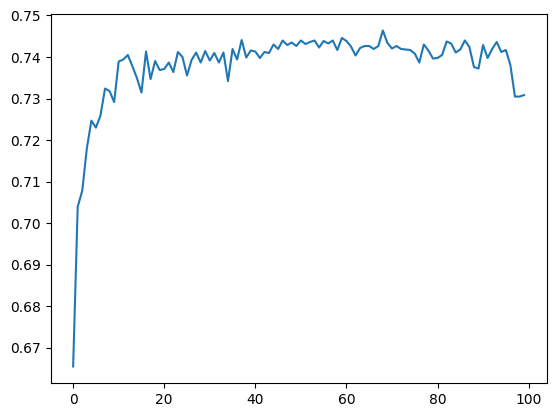

In [ ]:
plt.plot(accuracy)
plt.show()

In [ ]:

def lr_scheduler(epochs):
  initial_lr = 0.01
  drop_rate = 1.1 # after fixed number of epochs, lr = lr * drop rate
  drop_after_epochs = 20
  lr = initial_lr * ( drop_rate ** ( epochs//drop_after_epochs ))
  return lr

In [ ]:
model_2 = tf.keras.Sequential([

    tf.keras.layers.Dense(40, activation = 'relu'),
    tf.keras.layers.Dense(20, activation = 'relu'), # 1 hidden layer
    # tf.keras.layers.Dense(2, activation = 'relu'), # 2 hidden layer
    # tf.kerivation = 'relu'), # 2 hidden layer
    tf.keras.layers.Dense(1, activation = 'sigmoid') # 1 output layer
])


model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
              metrics = ['accuracy']
)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
history = model_2.fit(X, y, epochs = 500, batch_size = 256, callbacks = [lr_schedule])
# history = model_2.fit(X, y, epochs = 150)

Epoch 1/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6406 - loss: 3.7052 - learning_rate: 0.0100
Epoch 2/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7017 - loss: 1.2601 - learning_rate: 0.0100
Epoch 3/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7313 - loss: 0.7969 - learning_rate: 0.0100
Epoch 4/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7237 - loss: 0.7221 - learning_rate: 0.0100
Epoch 5/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7221 - loss: 0.9911 - learning_rate: 0.0100
Epoch 6/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7148 - loss: 0.7895 - learning_rate: 0.0100
Epoch 7/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7228 - loss: 0.7976 - learning_rate: 0.0100
Epoch 8/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7260 - loss: 0.6707 - learning_rate: 0.0100
Epoch 9/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7371 - loss: 0.5214 - learning_rate: 0.0100
Epoch 10/500
33/33 

In [ ]:
accuracy = history.history['accuracy']

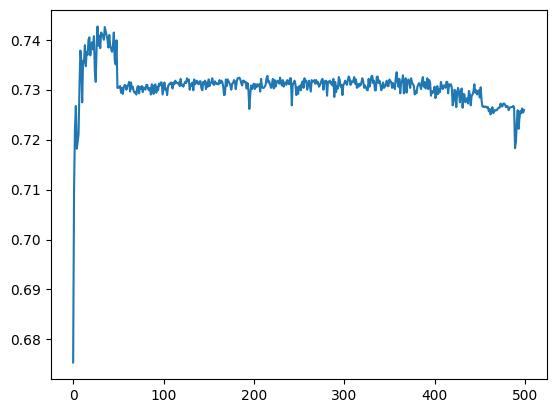

In [ ]:
plt.plot(accuracy)
plt.show()